# Titanic survival

### In this notebook we study Titanic survival data (from [Kaggle](https://www.kaggle.com/c/titanic)) and try to predict who will survive and who won't. 

#### This notebook is organized as follows:

1. Data analysis and visualization
2. Predictions

### 1. Data Analysis and visualization

#### As usual, we start by importing the basic libraries and loading the csv data file into a pandas dataframe. After that we will analyze the data thoroughly. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!head titanic_train.csv

In [3]:
titanic_train_data = pd.read_csv('titanic_train.csv', index_col='PassengerId')

In [4]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic_train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### To get a better feeling which kind of values the features have in the data, we take a look at the first 50 rows of the dataframe.

In [6]:
titanic_train_data.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


#### Let us check if the Ticket numbers are unique...

In [7]:
titanic_train_data['Ticket'].value_counts(normalize=True)

1601                  0.007856
347082                0.007856
CA. 2343              0.007856
347088                0.006734
3101295               0.006734
CA 2144               0.006734
S.O.C. 14879          0.005612
382652                0.005612
347077                0.004489
113760                0.004489
113781                0.004489
349909                0.004489
17421                 0.004489
2666                  0.004489
19950                 0.004489
4133                  0.004489
W./C. 6608            0.004489
LINE                  0.004489
PC 17757              0.004489
230080                0.003367
371110                0.003367
239853                0.003367
PC 17582              0.003367
SC/Paris 2123         0.003367
PC 17572              0.003367
13502                 0.003367
PC 17760              0.003367
35273                 0.003367
110413                0.003367
29106                 0.003367
                        ...   
3474                  0.001122
330958  

#### In order to find out which features are significant in predicting whether a passenger survived (having 1 in the 'Survived' column) or not (0) let us inspect some crosstables and their countplots. Since, presumably, for each name there is exactly one passenger and from above we see that ticket numbers are almost one-to-one, we leave Name and Ticket out. On the other hand, cabins are missing from most of the passengers so we will exclude Cabin also. From the known facts of Titanic's story, we expect that the Sex and Pclass will have significant effect on one's survival.

In [8]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


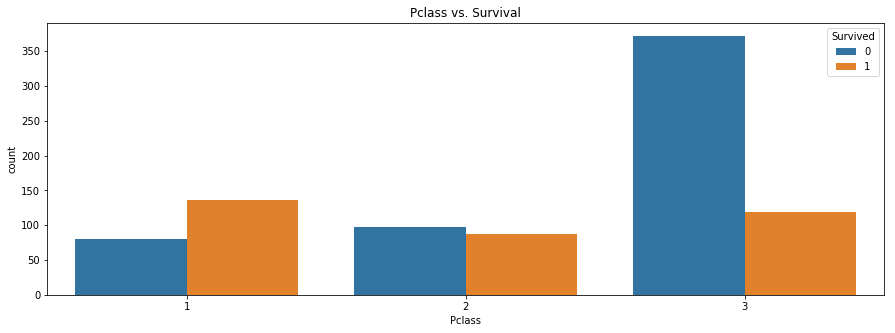

In [9]:
plt.figure(figsize=(15,5))
plt.title("Pclass vs. Survival")
sns.countplot(titanic_train_data['Pclass'], hue=titanic_train_data['Survived'])

#### As expected, the higher the class (i.e., the lower the Pclass number), the better is the survival rate. Since the correspondence is linear, there is no need for changing the numeric values or one-hot-encoding at this point (*).

##### (*) It could be that Pclass together with some other feature (e.g. Sex) doesn't have linear correspondence to survival, but for the sake of simplicity we ignore this possibility at least for now.

In [10]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


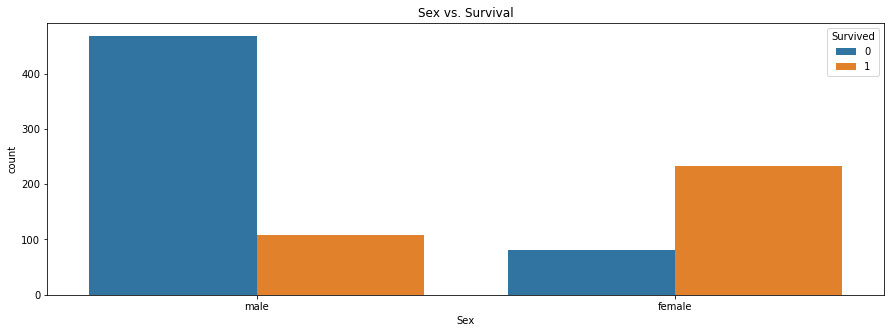

In [11]:
plt.figure(figsize=(15,5))
plt.title("Sex vs. Survival")
sns.countplot(titanic_train_data['Sex'], hue=titanic_train_data['Survived'])

#### It really does seem that the sex of the passenger is a strong indicator for one's survival. However, we must change the categorical values (male, female) to numerical ones. We will do this later.

#### There is no point in analyzing Age with all different values separately, so let's divide the passengers to somewhat suitable bins by their age for the crosstab.

In [12]:
pd.crosstab(titanic_train_data['Survived'], pd.cut(titanic_train_data['Age'], bins=[0,16,30,45,60,80]))

Age,"(0, 16]","(16, 30]","(30, 45]","(45, 60]","(60, 80]"
Survived,,,,,
0,45,198,116,48,17
1,55,111,86,33,5


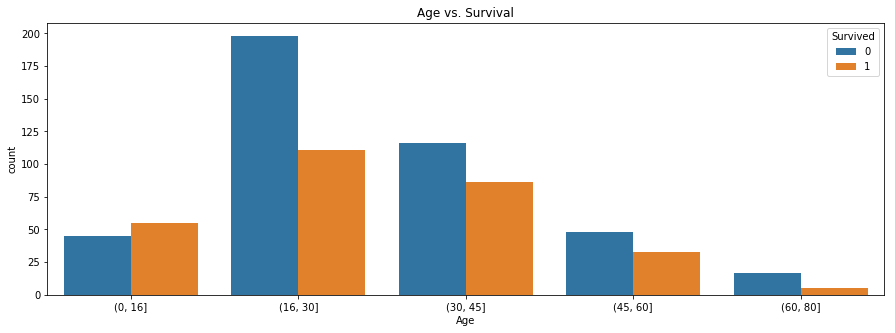

In [13]:
plt.figure(figsize=(15,5))
plt.title("Age vs. Survival")
sns.countplot(pd.cut(titanic_train_data['Age'], bins=[0,16,30,45,60,80]), hue=titanic_train_data['Survived'])

#### As we see, more than half of the children (16 years or less), around one third from young adults, around 40% of both adults (30-45 yrs) and middle-aged (45-60yrs), and around one fifth from older people (60-80 yrs) survived. In the data set there seems to be a couple of hundred people with unknown age, but since we don't want to drop Age out, we will impute the data later.

In [14]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


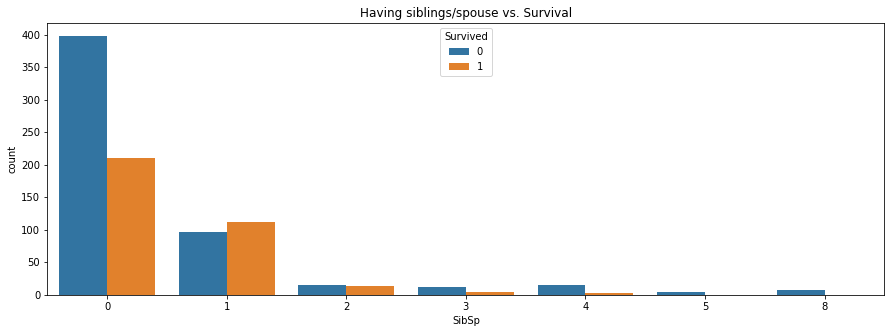

In [15]:
plt.figure(figsize=(15,5))
plt.title("Having siblings/spouse vs. Survival")
sns.countplot(titanic_train_data['SibSp'], hue=titanic_train_data['Survived'])

#### As the data suggests, most of the passengers travelled without their siblings/spouse and quite a few had more than 1 sibling/spouse. Let's take a closer look with 3 bins (0, 1 or more siblings/spouse).

In [16]:
pd.crosstab(titanic_train_data['Survived'], pd.cut(titanic_train_data['SibSp'], bins=[-1,0,1,8]))

SibSp,"(-1, 0]","(0, 1]","(1, 8]"
Survived,,,
0,398,97,54
1,210,112,20


#### So, having 1 sibling/spouse on board increases the changes of survival but travelling without them (as perhaps most young men did) or having 2 or more siblings/spouse decreases it. Maybe this feature together with Age would tell more. Lets see next if having parents or children on board has an impact to survival.

In [17]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


#### Since a vast majority of passengers travels without parents or children, we will divide the passengers to 2 bins in order to have a better idea of the impact of having family onboard.

In [18]:
pd.crosstab(titanic_train_data['Survived'], pd.cut(titanic_train_data['Parch'], bins=[-1,0,6]))

Parch,"(-1, 0]","(0, 6]"
Survived,,
0,445,104
1,233,109


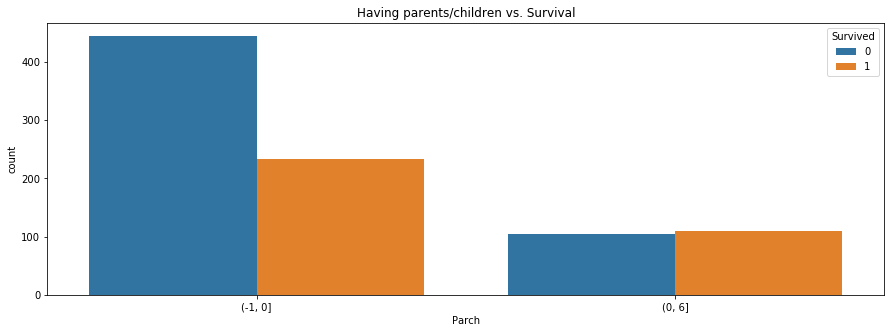

In [19]:
plt.figure(figsize=(15,5))
plt.title("Having parents/children vs. Survival")
sns.countplot(pd.cut(titanic_train_data['Parch'], bins=[-1,0,6]), hue=titanic_train_data['Survived'])

#### There is power in the family, however, we must notice that the difference in the sizes of these 2 bins is noticeable.

In [20]:
pd.crosstab(titanic_train_data['Survived'], pd.qcut(titanic_train_data['Fare'], 4))

Fare,"(-0.001, 7.91]","(7.91, 14.454]","(14.454, 31.0]","(31.0, 512.329]"
Survived,,,,
0,179,156,121,93
1,44,68,101,129


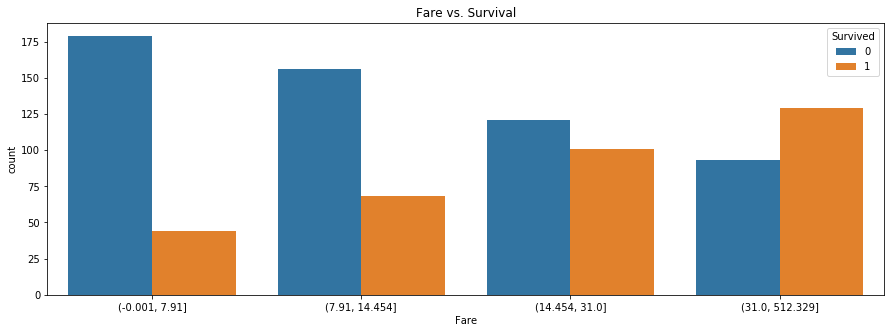

In [21]:
plt.figure(figsize=(15,5))
plt.title("Fare vs. Survival")
sns.countplot(pd.qcut(titanic_train_data['Fare'], 4), hue=titanic_train_data['Survived'])

#### Dividing feature Fare to quantiles shows clearly that the higher the price of the ticket, the better chance the passenger has for surviving.

In [22]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


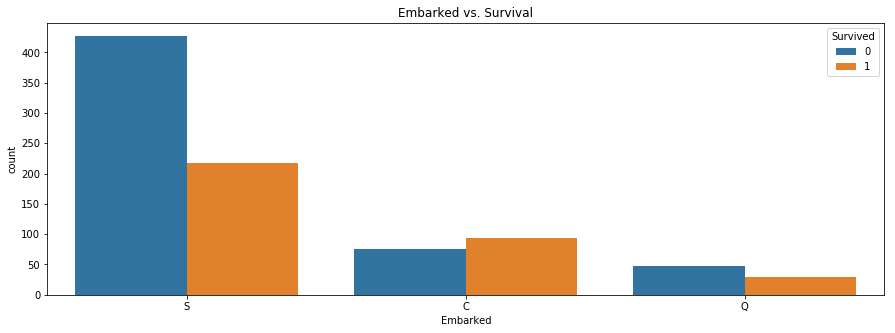

In [23]:
plt.figure(figsize=(15,5))
plt.title("Embarked vs. Survival")
sns.countplot(titanic_train_data['Embarked'], hue=titanic_train_data['Survived'])

#### What comes to the place of embarking, it looks like C has been the best place to hop onboard. Note, however, that most passengers came from S.

#### One could easily think that the name of the passenger does not have any effect on his/hers survival. Nevertheless, the (relationship) status might have, and therefore we will take a closer look to the feature 'Name'. Indeed, at a glimpse, it looks like all passengers have a title (Mr./Mrs./Master./Miss./Don.). Recall that "Master." was used for underage boys.

In [24]:
titanic_train_data['Name'].head(50)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
11                      Sandstrom, Miss. Marguerite Rut
12                             Bonnell, Miss. Elizabeth
13                       Saundercock, Mr. William Henry
14                          Andersson, Mr. Anders Johan
15                 Vestrom, Miss. Hulda Amanda Adolfina
16                     Hewlett, Mrs. (Mary D Kingcome) 
17                                 Rice, Master. Eugene
18                         Williams,

#### For digging out the title from the names, we will define some functions and add columns which tell whether (1=true, 0=false) the passenger has certain title. The end result corresponds pretty much one-hot-encoding.

In [25]:
def titleMrs(name):
    return 1*("Mrs." in name)

def titleMiss(name):
    return 1*("Miss." in name)

def titleMr(name):
    return 1*("Mr." in name)

def titleMaster(name):
    return 1*("Master." in name)

def titleDon(name):
    return 1*("Don." in name)

In [26]:
titanic_train_data['TitleMrs.']=titanic_train_data['Name'].apply(titleMrs)
titanic_train_data['TitleMiss.']=titanic_train_data['Name'].apply(titleMiss)
titanic_train_data['TitleMr.']=titanic_train_data['Name'].apply(titleMr)
titanic_train_data['TitleMaster.']=titanic_train_data['Name'].apply(titleMaster)
titanic_train_data['TitleDon.']=titanic_train_data['Name'].apply(titleDon)

In [27]:
titanic_train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TitleMrs.,TitleMiss.,TitleMr.,TitleMaster.,TitleDon.
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1,0,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,0,1,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0,0,0,0


In [28]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['TitleMrs.'])

TitleMrs.,0,1
Survived,,
0,523,26
1,243,99


In [29]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['TitleMr.'])

TitleMr.,0,1
Survived,,
0,113,436
1,261,81


In [30]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['TitleMiss.'])

TitleMiss.,0,1
Survived,,
0,494,55
1,215,127


In [31]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['TitleMaster.'])

TitleMaster.,0,1
Survived,,
0,532,17
1,319,23


In [32]:
pd.crosstab(titanic_train_data['Survived'], titanic_train_data['TitleDon.'])

TitleDon.,0,1
Survived,,
0,548,1
1,342,0


#### There is only 1 person having title Don. so we can just as well drop the TitleDon column away.

In [33]:
titanic_train_data.drop('TitleDon.', axis=1, inplace=True)

#### So, our target is 'Survived' and for the model(s) we will drop the columns 'Name', 'Ticket' and 'Cabin' altogether from the data. Since there are not too many features left (12 to be exact), we will keep them at least at this point and, if necessary, see more closely correlation values later.

In [34]:
y=titanic_train_data.Survived
X=titanic_train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [35]:
X.head(30)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TitleMrs.,TitleMiss.,TitleMr.,TitleMaster.
PassengerId,,,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,0,0,1,0
2,1,female,38.0,1,0,71.2833,C,1,0,0,0
3,3,female,26.0,0,0,7.9250,S,0,1,0,0
4,1,female,35.0,1,0,53.1000,S,1,0,0,0
5,3,male,35.0,0,0,8.0500,S,0,0,1,0
6,3,male,NaN,0,0,8.4583,Q,0,0,1,0
7,1,male,54.0,0,0,51.8625,S,0,0,1,0
8,3,male,2.0,3,1,21.0750,S,0,0,0,1
9,3,female,27.0,0,2,11.1333,S,1,0,0,0


#### Our dataframe looks pretty good at this point, however, we must change the categorical values in Sex to numerical ones and one-hot-encode the Embarked column. We could also one-hot-encode Sex, but since there are only 2 possible values, we can just as well replace 'female' by 1 and 'male' by 0. Let's not forget that we must impute the data (since there are lots of missing values in Age) but we'll get back to this later.

In [36]:
X.loc[X.Sex == 'male', 'Sex'] = 0
X.loc[X.Sex == 'female', 'Sex'] = 1

In [37]:
X.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TitleMrs.,TitleMiss.,TitleMr.,TitleMaster.
PassengerId,,,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,0,0,1,0
2,1,1,38.0,1,0,71.2833,C,1,0,0,0
3,3,1,26.0,0,0,7.9250,S,0,1,0,0
4,1,1,35.0,1,0,53.1000,S,1,0,0,0
5,3,0,35.0,0,0,8.0500,S,0,0,1,0
6,3,0,NaN,0,0,8.4583,Q,0,0,1,0
7,1,0,54.0,0,0,51.8625,S,0,0,1,0
8,3,0,2.0,3,1,21.0750,S,0,0,0,1
9,3,1,27.0,0,2,11.1333,S,1,0,0,0


In [38]:
X_one_hot = pd.get_dummies(X)

In [39]:
X_one_hot.head(50)

,Pclass,Sex,Age,SibSp,Parch,Fare,TitleMrs.,TitleMiss.,TitleMr.,TitleMaster.,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0
3,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,0,0,1
5,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,1
6,3,0,NaN,0,0,8.4583,0,0,1,0,0,1,0
7,1,0,54.0,0,0,51.8625,0,0,1,0,0,0,1
8,3,0,2.0,3,1,21.0750,0,0,0,1,0,0,1
9,3,1,27.0,0,2,11.1333,1,0,0,0,0,0,1


#### For final feature selection we will check the mutual infos and the correlations.

In [40]:
from sklearn.feature_selection import mutual_info_classif

In [41]:
# We have to drop Age temporarily just for mutual info since it has NaN values.
X_one_hot.columns.drop('Age')

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'TitleMrs.', 'TitleMiss.',
       'TitleMr.', 'TitleMaster.', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [42]:
np.round(mutual_info_classif(X_one_hot.drop('Age', axis=1), y, discrete_features=True),2)

array([0.06, 0.15, 0.02, 0.02, 0.3 , 0.06, 0.05, 0.16, 0.  , 0.01, 0.  ,
       0.01])

In [43]:
dict(zip(X_one_hot.columns.drop('Age'),
         np.round(mutual_info_classif(X_one_hot.drop('Age', axis=1), y, discrete_features=True),2)))

{'Embarked_C': 0.01,
 'Embarked_Q': 0.0,
 'Embarked_S': 0.01,
 'Fare': 0.3,
 'Parch': 0.02,
 'Pclass': 0.06,
 'Sex': 0.15,
 'SibSp': 0.02,
 'TitleMaster.': 0.0,
 'TitleMiss.': 0.05,
 'TitleMr.': 0.16,
 'TitleMrs.': 0.06}

#### From mutual information (see more info from [Wikipedia](https://en.wikipedia.org/wiki/Mutual_information)) we see that Embarked_Q and TitleMaster are the least significant and Age and TitleMr. the most. Below we see the correlations from each feature to the target separately.

In [44]:
df = X_one_hot.copy()

In [45]:
df['Survived'] = titanic_train_data['Survived']

In [46]:
df.corr()['Survived'].sort_values()

TitleMr.       -0.549199
Pclass         -0.338481
Embarked_S     -0.155660
Age            -0.077221
SibSp          -0.035322
Embarked_Q      0.003650
Parch           0.081629
TitleMaster.    0.085221
Embarked_C      0.168240
Fare            0.257307
TitleMiss.      0.327093
TitleMrs.       0.339040
Sex             0.543351
Survived        1.000000
Name: Survived, dtype: float64

#### If we look at the impact of each feature to the target, the features SibSp and Embarked_Q have the smallest correlation. These features have also really small impact given by the mutual information so we will drop these two as well as TitleMaster and Parch.

In [47]:
X_one_hot.drop(['SibSp', 'Embarked_Q', 'TitleMaster.', 'Parch'], axis=1, inplace=True)

#### Before imputing the data, we will split the data to train and test sets. This is done in this order to avoid any leakage from the test set to train set since Imputer uses mean as a default strategy.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, 
                                                    y,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=2)

In [50]:
from sklearn.preprocessing import Imputer

In [51]:
my_imputer = Imputer()

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_train.columns = X_one_hot.columns

imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))
imputed_X_test.columns = X_one_hot.columns

 ### 2. Predictions
 
 #### In this section we predict the survivors and analyze our model in terms of its reliability.

#### Since this is a classification problem, we will use Random Forest Classifier for our model.

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=None, random_state=2)
rf.fit(imputed_X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
pred = rf.predict(imputed_X_test)

In [56]:
accuracy_score(y_test, pred)

0.8022388059701493

#### The accuracy score with this model is around 80%. One reason for our model not to perform better is perhaps that the data set is relatively small. Also, one must take into account that in this type of case/scenario there is certainly some natural randomness whether person survives or not. Next we see how well our model predicts one's probability to survive.

In [57]:
pred_proba = rf.predict_proba(imputed_X_test)[:,1]

In [58]:
df_results = pd.DataFrame()

#### We are interested in what was the probability to survive for those who did not survive. Naturally we would want these values to be small.

In [59]:
df_results['Survived'] = y_test
df_results['PredProba'] = np.round(pred_proba,4)

In [60]:
df_results[df_results.Survived==0]['PredProba']

PassengerId
38     0.0688
170    0.2235
607    0.0091
786    0.0149
729    0.0450
21     0.1359
598    0.0908
703    0.1541
281    0.2131
506    0.5758
334    0.0453
403    0.1027
144    0.2268
138    0.6019
356    0.1148
318    0.1405
841    0.4686
180    0.0908
814    0.3400
186    0.1849
618    0.7938
387    0.2800
336    0.0091
813    0.0890
466    0.0008
161    0.0237
372    0.1695
653    0.0426
558    0.0583
159    0.2304
        ...  
792    0.0500
200    1.0000
130    0.0608
91     0.0604
127    0.0787
164    0.0376
112    0.4862
627    0.1305
868    0.3745
799    0.1045
233    0.1388
807    0.0600
659    0.0084
399    0.2037
73     0.0159
294    0.1672
345    0.0680
777    0.0787
13     0.3998
309    0.1785
668    0.0210
669    0.0041
109    0.0024
285    0.3823
182    0.3113
567    0.0630
672    0.3745
697    0.0041
43     0.0413
397    0.3567
Name: PredProba, Length: 160, dtype: float64

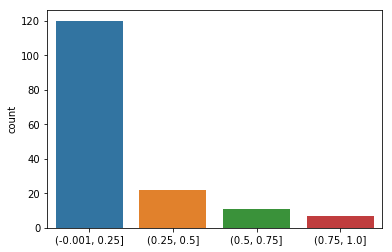

In [61]:
sns.countplot(pd.cut(df_results[df_results.Survived==0]['PredProba'].values,4))

#### Let us check the confusion matrix and try to analyze where the model did wrong.

In [62]:
confusion_matrix(y_test, pred)

array([[142,  18],
       [ 35,  73]])

#### From the confusion matrix we see that in the test set there were 145 true negatives (not survived and predicted to not survive), 15 false positives (not survived but predicted to survive), 34 false negatives and 74 true positives.

#### Let us see if there are any common features in the cases where our model did not succeed to predict right. We will do this by creating a data frame by copying X_test and adding columns y_test and pred to it. Then we will drop the rows where the prediction went right.

In [63]:
X_comparison = X_test.copy()

In [64]:
X_comparison['Survived'] = y_test
X_comparison['Predicted'] = pred

In [65]:
X_comparison

,Pclass,Sex,Age,Fare,TitleMrs.,TitleMiss.,TitleMr.,Embarked_C,Embarked_S,Survived,Predicted
PassengerId,,,,,,,,,,,
708,1,0,42.0,26.2875,0,0,1,0,1,1,1
38,3,0,21.0,8.0500,0,0,1,0,1,0,0
616,2,1,24.0,65.0000,0,1,0,0,1,1,1
170,3,0,28.0,56.4958,0,0,1,0,1,0,0
69,3,1,17.0,7.9250,0,1,0,0,1,1,0
607,3,0,30.0,7.8958,0,0,1,0,1,0,0
631,1,0,80.0,30.0000,0,0,1,0,1,1,0
786,3,0,25.0,7.2500,0,0,1,0,1,0,0
661,1,0,50.0,133.6500,0,0,0,0,1,1,0


In [66]:
Wrong_predicted = X_comparison[X_comparison.Survived != X_comparison.Predicted]
Wrong_predicted

,Pclass,Sex,Age,Fare,TitleMrs.,TitleMiss.,TitleMr.,Embarked_C,Embarked_S,Survived,Predicted
PassengerId,,,,,,,,,,,
69,3,1,17.0,7.9250,0,1,0,0,1,1,0
631,1,0,80.0,30.0000,0,0,1,0,1,1,0
661,1,0,50.0,133.6500,0,0,0,0,1,1,0
693,3,0,NaN,56.4958,0,0,1,0,1,1,0
644,3,0,NaN,56.4958,0,0,1,0,1,1,0
193,3,1,19.0,7.8542,0,1,0,0,1,1,0
506,1,0,18.0,108.9000,0,0,1,1,0,0,1
138,1,0,37.0,53.1000,0,0,1,0,1,0,1
210,1,0,40.0,31.0000,0,0,1,1,0,1,0


#### At a first glimpse, it looks like there is no clear similarities between the passengers gotten wrong prediction.  Let's see how reliable our model is by using cross validation.  Since cross validation splits the data to different train and test sets each time and does not accept NaN values, we must impute the whole data first.

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
imputed_X_one_hot = pd.DataFrame(my_imputer.fit_transform(X_one_hot))
imputed_X_one_hot.columns = X_one_hot.columns

In [69]:
scores = cross_val_score(rf, imputed_X_one_hot, y, cv=5, scoring='accuracy')

In [70]:
scores

array([0.81564246, 0.82681564, 0.86516854, 0.79213483, 0.84745763])

#### The cross validation scores correspond pretty much in average our accuracy score which means that our model does not over/underfit. To improve our model we could test different hyperparameters in our random forest classifier. Also survival probabilities could be analyzed more carefully, for instance, by adjusting the threshold.